# LSTM

I want to create the general structure of as LSTM input data

creat 3 dimensions (the number of samples, lookback, the number of features)

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


target_file_path = "/Users/wangyuhang/Desktop/third semester/affective computing/pytorch_lab_git/pytorch_git_Bruce/pytorch_test/RNN_LSTM/archive/prices.csv"

dataPrices = pd.read_csv(target_file_path)

dataPrices

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [250]:
dataPrices_symbol = dataPrices[['symbol']]
max_frequency = dataPrices_symbol.value_counts().max()
value_counts = dataPrices_symbol.value_counts()
most_frequent_values = value_counts[value_counts == max_frequency].index.tolist()
most_frequent_values[0:5]

[('A',), ('PRGO',), ('NUE',), ('NTRS',), ('NTAP',)]

## all of share of stocks

In [195]:
dataPrices_select = dataPrices[["date", "symbol", "close"]]
dataPrices_select

,date,symbol,close
0,2016-01-05 00:00:00,WLTW,125.839996
1,2016-01-06 00:00:00,WLTW,119.980003
2,2016-01-07 00:00:00,WLTW,114.949997
3,2016-01-08 00:00:00,WLTW,116.620003
4,2016-01-11 00:00:00,WLTW,114.970001
...,...,...,...
851259,2016-12-30,ZBH,103.199997
851260,2016-12-30,ZION,43.040001
851261,2016-12-30,ZTS,53.529999
851262,2016-12-30 00:00:00,AIV,45.450001


## choose A as the sample(or I can choose any brand if I want)

In [280]:
dataPrices_select_A = dataPrices_select[dataPrices_select["symbol"] == "A"]
dataPrices_select_A = dataPrices_select_A[["date","close"]]
dataPrices_select_A

,date,close
251,2010-01-04,31.300001
718,2010-01-05,30.960001
1186,2010-01-06,30.850001
1654,2010-01-07,30.809999
2122,2010-01-08,30.800000
...,...,...
848764,2016-12-23,46.200001
849264,2016-12-27,46.509998
849764,2016-12-28,45.720001
850264,2016-12-29,45.639999


In [281]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

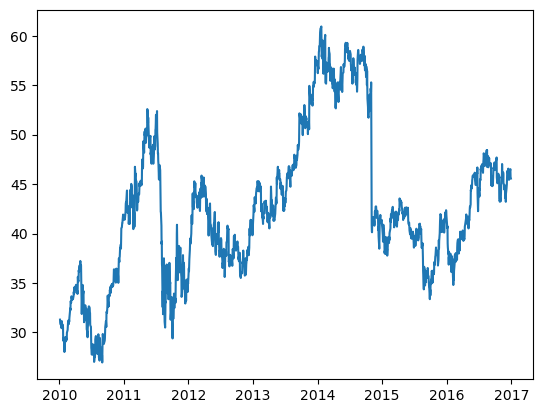

In [282]:
dataPrices_select_A['date'] = pd.to_datetime(dataPrices_select_A['date'])

plt.plot(dataPrices_select_A['date'], dataPrices_select_A['close'])

## create the time line lookback**

This is a very import feature of LSTM preprocessing.

In [283]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(dataPrices_select_A, lookback)
shifted_df

,close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
date,,,,,,,,
2010-01-13,30.689999,30.450001,30.820001,30.800000,30.809999,30.850001,30.960001,31.300001
2010-01-14,31.150001,30.689999,30.450001,30.820001,30.800000,30.809999,30.850001,30.960001
2010-01-15,30.430000,31.150001,30.689999,30.450001,30.820001,30.800000,30.809999,30.850001
2010-01-19,30.800000,30.430000,31.150001,30.689999,30.450001,30.820001,30.800000,30.809999
2010-01-20,30.630001,30.800000,30.430000,31.150001,30.689999,30.450001,30.820001,30.800000
...,...,...,...,...,...,...,...,...
2016-12-23,46.200001,45.970001,46.040001,46.209999,45.430000,45.910000,46.560001,46.139999
2016-12-27,46.509998,46.200001,45.970001,46.040001,46.209999,45.430000,45.910000,46.560001
2016-12-28,45.720001,46.509998,46.200001,45.970001,46.040001,46.209999,45.430000,45.910000


## to_numpy to do some reshape and scaler processing

In [284]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[30.689999, 30.450001, 30.820001, ..., 30.850001, 30.960001,
        31.300001],
       [31.150001, 30.689999, 30.450001, ..., 30.809999, 30.850001,
        30.960001],
       [30.43    , 31.150001, 30.689999, ..., 30.8     , 30.809999,
        30.850001],
       ...,
       [45.720001, 46.509998, 46.200001, ..., 46.209999, 45.43    ,
        45.91    ],
       [45.639999, 45.720001, 46.509998, ..., 46.040001, 46.209999,
        45.43    ],
       [45.560001, 45.639999, 45.720001, ..., 45.970001, 46.040001,
        46.209999]])

In [285]:
shifted_df_as_np.shape

(1755, 8)

In [286]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.78091879, -0.79505294, -0.7732626 , ..., -0.77149582,
        -0.76501761, -0.74499405],
       [-0.75382797, -0.78091879, -0.79505294, ..., -0.77385165,
        -0.77149582, -0.76501761],
       [-0.79623086, -0.75382797, -0.78091879, ..., -0.77444052,
        -0.77385165, -0.77149582],
       ...,
       [ 0.10424034,  0.15076549,  0.13250889, ...,  0.1330977 ,
         0.08716137,  0.11542992],
       [ 0.0995288 ,  0.10424034,  0.15076549, ...,  0.12308604,
         0.1330977 ,  0.08716137],
       [ 0.09481749,  0.0995288 ,  0.10424034, ...,  0.11896355,
         0.12308604,  0.1330977 ]])

## split the X and y(close data) 

In [287]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((1755, 7), (1755,))

## deepcopy create a copy-array and flip the data along the axis=1(along the feature dimension)

In [288]:
X = dc(np.flip(X, axis=1))
X

array([[-0.74499405, -0.76501761, -0.77149582, ..., -0.77444052,
        -0.7732626 , -0.79505294],
       [-0.76501761, -0.77149582, -0.77385165, ..., -0.7732626 ,
        -0.79505294, -0.78091879],
       [-0.77149582, -0.77385165, -0.77444052, ..., -0.79505294,
        -0.78091879, -0.75382797],
       ...,
       [ 0.11542992,  0.08716137,  0.1330977 , ...,  0.11896355,
         0.13250889,  0.15076549],
       [ 0.08716137,  0.1330977 ,  0.12308604, ...,  0.13250889,
         0.15076549,  0.10424034],
       [ 0.1330977 ,  0.12308604,  0.11896355, ...,  0.15076549,
         0.10424034,  0.0995288 ]])

## split train and test data

In [289]:
split_index = int(len(X) * 0.80)

split_index

1404

In [290]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1404, 7), (351, 7), (1404,), (351,))

In [291]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1404, 7, 1), (351, 7, 1), (1404, 1), (351, 1))

In [292]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1404, 7, 1]),
 torch.Size([351, 7, 1]),
 torch.Size([1404, 1]),
 torch.Size([351, 1]))

In [293]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [294]:
train_dataset

In [295]:
from torch.utils.data import DataLoader

batch_size = 3

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [296]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([3, 7, 1]) torch.Size([3, 1])


## create LSTM module

I just set 1 stack layer because we only have 1700 more or less figures in data set

In [297]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(input_size = 1, hidden_size = 4, num_stacked_layers = 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [298]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.5f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [299]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.5f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [300]:
learning_rate = 0.001
num_epochs = 20
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.39699
Batch 200, Loss: 0.19563
Batch 300, Loss: 0.10109
Batch 400, Loss: 0.03557

Val Loss: 0.00574
***************************************************

Epoch: 2
Batch 100, Loss: 0.01055
Batch 200, Loss: 0.01067
Batch 300, Loss: 0.00800
Batch 400, Loss: 0.00756

Val Loss: 0.00330
***************************************************

Epoch: 3
Batch 100, Loss: 0.00517
Batch 200, Loss: 0.00520
Batch 300, Loss: 0.00701
Batch 400, Loss: 0.00522

Val Loss: 0.00210
***************************************************

Epoch: 4
Batch 100, Loss: 0.00362
Batch 200, Loss: 0.00473
Batch 300, Loss: 0.00614
Batch 400, Loss: 0.00450

Val Loss: 0.00239
***************************************************

Epoch: 5
Batch 100, Loss: 0.00296
Batch 200, Loss: 0.00462
Batch 300, Loss: 0.00459
Batch 400, Loss: 0.00500

Val Loss: 0.00200
***************************************************

Epoch: 6
Batch 100, Loss: 0.00299
Batch 200, Loss: 0.00598
Batch 300, Loss: 0.00349
Batch 400, 

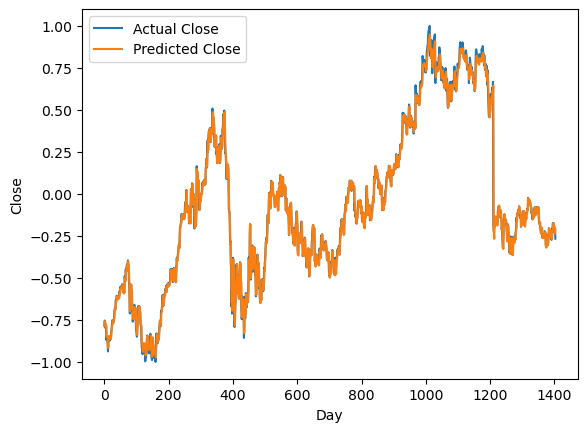

In [301]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

## restore the predicted as the original data

In [302]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
print(dummies.shape)
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

(1404, 8)


array([30.57234508, 30.70125054, 31.09554946, ..., 40.13210876,
       39.94627038, 40.38935087])

In [303]:
dummies = np.zeros((X_train.shape[0], lookback+1))
print(dummies.shape)
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

(1404, 8)


array([30.68999917, 31.15000075, 30.43000012, ..., 39.99000189,
       40.47000104, 39.41999786])

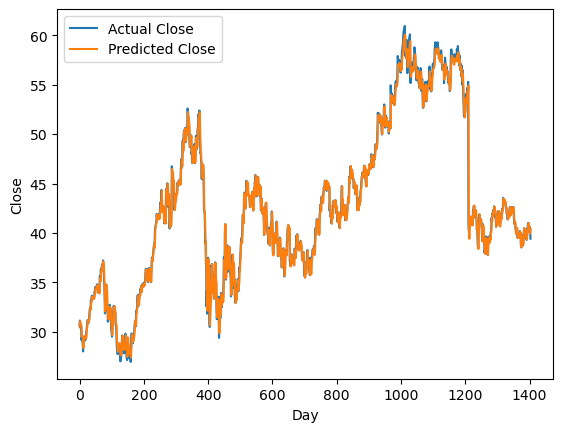

In [304]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [305]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([39.46366789, 38.86304392, 38.50888942, 38.57039293, 38.7472794 ,
       38.95732892, 38.41492121, 37.53393198, 36.28154937, 34.76960292,
       34.30266855, 35.38332632, 36.47407866, 36.49082262, 36.30161298,
       34.90859888, 35.38791715, 35.67551479, 35.09469129, 36.03215902,
       35.58178138, 35.78563389, 35.9103321 , 35.55866936, 36.04208557,
       36.44415833, 36.38202328, 35.77580653, 35.64789595, 35.07926405,
       34.90811713, 34.5481654 , 34.41355784, 33.48451574, 33.65123074,
       34.20953328, 33.78719853, 34.5139599 , 35.22596301, 34.93059558,
       35.43389423, 35.92973785, 36.18325954, 35.98873341, 35.63474388,
       35.07844123, 35.46810682, 35.71170297, 36.13989972, 36.27706583,
       35.91366895, 36.03022391, 36.9712805 , 36.83475504, 36.99479735,
       37.44630752, 37.66261781, 37.7309023 , 38.49405426, 38.28718572,
       38.30728374, 38.27258131, 38.11771279, 37.89534212, 37.92347814,
       37.64102898, 37.45097121, 36.78225607, 37.21140013, 38.24

In [306]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([38.88999883, 38.56000082, 38.65000217, 38.81999987, 39.01999987,
       38.40000203, 37.50999815, 36.23000024, 34.67999983, 34.36000124,
       35.61999879, 36.63999916, 36.50999812, 36.31000116, 34.74999981,
       35.52999896, 35.74999983, 35.060001  , 36.20999888, 35.54000091,
       35.86000102, 35.95999925, 35.54999881, 36.15000186, 36.52000007,
       36.40000199, 35.74000193, 35.68999876, 35.04999855, 34.95000133,
       34.5499993 , 34.45000107, 33.36999912, 33.74000189, 34.33000198,
       33.74000189, 34.66999839, 35.3399999 , 34.90000221, 35.54000091,
       36.00999786, 36.23000024, 35.99000206, 35.63000124, 35.04999855,
       35.58000213, 35.7799991 , 36.23000024, 36.32000007, 35.90000224,
       36.08999979, 37.11000117, 36.83000177, 37.0499991 , 37.52000009,
       37.70000076, 37.75999777, 38.59000009, 38.26999998, 38.33999996,
       38.29999925, 38.13999894, 37.91999808, 37.98000015, 37.66000005,
       37.49000184, 36.7700002 , 37.33000204, 38.38000117, 39.33

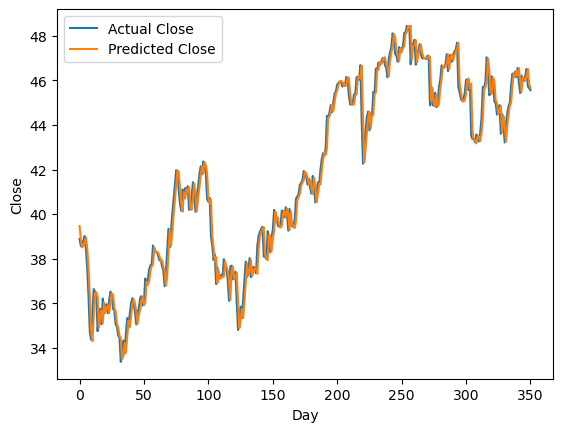

In [307]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


## accuracy of final model

In [308]:
test_accuracy = new_y_test - test_predictions
count = 0
for i in test_accuracy:
    if (i > 0.01 or i < -0.01):
        count += 1
print(count/len(new_y_test)*100)

count = 0
for i in test_accuracy:
    if (i > 0.05 or i < -0.05):
        count += 1
print(count/len(new_y_test)*100)

99.14529914529915
93.16239316239316
